## Analysis Experiment 2 in "Risk optimization during ongoing movement: Insights from movement and gaze behavior in throwing"

---

Authors: Stephan Zahno, Damian Beck, Ralf Kredel, André Klostermann, & Ernst-Joachim Hossner

---

The notebook takes input data from 'data/data_exp2.xlsx' and analyzes:


1. participants' strategies (i.e. horizontal shifts) as a function of penalty (0 vs -500) x distance (30 vs 45 vs 60)  
    It generates bar plots, descriptive statistics and runs repeated measures ANOVAs to test interaction effects for the 3 variables:

    a. ball's impact location (Figure 6 right in paper)  
    b. final gaze fixation location (Figure 6 left in paper)  
    c. difference between the locations of the final gaze fixation and ball's impact

2. participants' strategies (i.e. horizontal shifts) vs. optimal horizontal shifts (predicted by the maximum expected gain model)  
    For that aim, it

   a. plots actual data vs. model predictions  
   b. plots locations of final fixation vs. ball's impact vs. optimal aim point  in target space  
   c. tests wether the difference between fixation-optimal is sig. larger than ball-optimal.  

All plots are displayed in the Notebook and exported to the folder "figures".

---


To ensure that the code runs properly, consider activating our "VR_throwing" conda environment

In [ ]:
# Step 1: Create a new Conda environment using the provided environment.yml file
!conda env create -f ../environment.yml

# Step 2: Verify that the environment was created successfully
!conda env list

# Step 3: Check that the 'VR_throwing' environment is available
!conda info --envs

# Step 4: Activate the 'VR_throwing' environment

# NOTE: You cannot directly activate a Conda environment in a Jupyter Notebook.
# If you are NOT already running this notebook in the desired environment, follow these steps:
# 1. Install ipykernel in the 'VR_throwing' environment:
#    conda install -n VR_throwing ipykernel
# 2. Add the environment to Jupyter as a kernel:
#    python -m ipykernel install --user --name=VR_throwing --display-name "Python (VR_throwing)"
# 3. Restart this notebook and select the "Python (VR_throwing)" kernel from the Kernel menu.


---

## Analysis Script

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

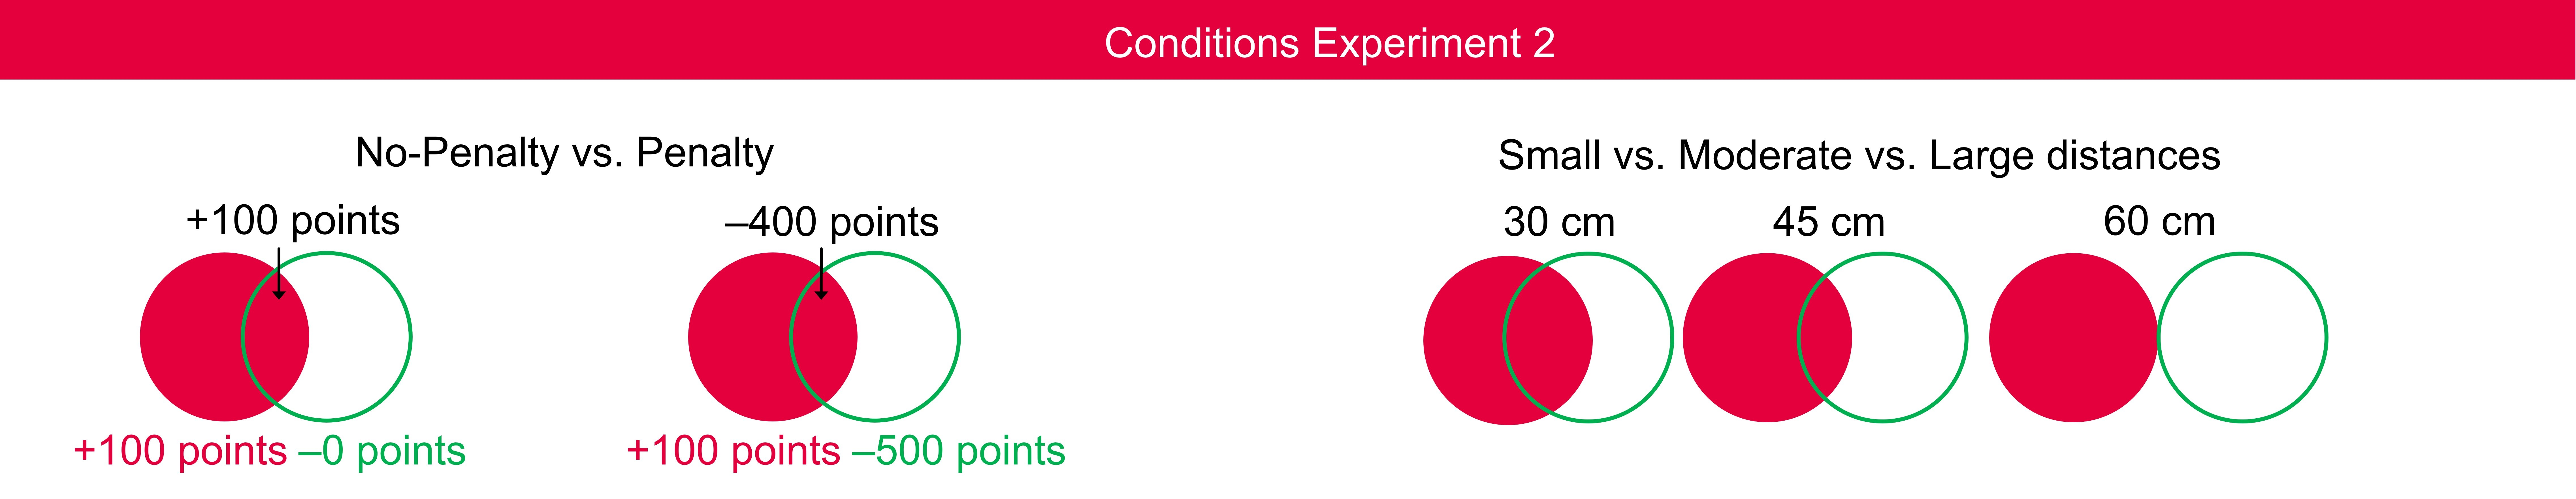

In [3]:
from IPython.display import display, Image
display(Image(filename=r'../figures/conditions_exp2.jpg'))

### Import Data

In [4]:
file_path = '../data/data_exp2.xlsx'
data = pd.read_excel(file_path)

### Aggregate Data for Analysis

In [5]:
aggregated_data_individual = data.groupby(['Vpn', 'Penalty_condition', 'Distance_condition']).agg({
    'Ball_impact_shift_x': ['mean'],
    'Ball_impact_y': ['mean'],
    'final_fixation_shift_x': ['mean'],
    'final_fixation_y': ['mean'],
    'diff_ball_fixation_shift_x': ['mean'],
    'optimal_shift_x': ['mean'], 
    'diff_fixation_optimal': ['mean'],
    'diff_ball_optimal': ['mean'],
}).reset_index()

aggregated_data_individual.columns = [
    'Vpn', 'Penalty_condition', 'Distance_condition',
    'Ball_impact_shift_x_mean',
    'Ball_impact_y_mean',
    'final_fixation_shift_x_mean',
    'final_fixation_y_mean',
    'diff_ball_fixation_shift_x_mean',
    'optimal_shift_x_mean',
    'diff_fixation_optimal_mean',
    'diff_ball_optimal_mean'
    ]

---

## 1. Participants' strategies (i.e. horizontal shifts) as a function of penalty (0 vs -500) x distance (60 vs 45 vs 30)   

## a. Ball's impact location

### Bar plot (figure 6 in paper) and descriptive stats

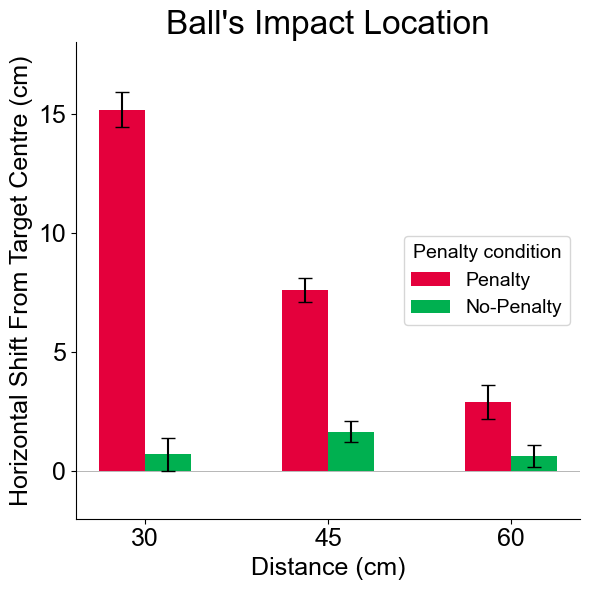

count       mean       std       min  \
Penalty_condition Distance_condition                                         
-500              30                   20.0  15.177366  3.342450  9.217878   
                  45                   20.0   7.616477  2.292408  4.727568   
                  60                   20.0   2.901280  3.126241 -2.927665   
 0                30                   20.0   0.706330  3.049797 -5.016184   
                  45                   20.0   1.651749  1.989858 -1.528580   
                  60                   20.0   0.650586  2.054715 -2.205795   

                                            25%        50%        75%  \
Penalty_condition Distance_condition                                    
-500              30                  13.144329  15.300632  17.300763   
                  45                   5.816525   7.149271   8.409757   
                  60                   0.984680   2.419749   4.606540   
 0                30                  -1.015683   0.415473   2.281825   
                  45                   0.143158   1.031254   3.504491   
                  60                  -0.577591   0.040689   1.658180   

                                            max  
Penalty_condition Distance_condition             
-500              30                  21.193004  
                  45                  12.081066  
                  60                   9.546956  
 0                30                   7.302782  
                  45                   5.066848  
                  60                   7.313385

In [6]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of Ball_impact_shift_x for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['Ball_impact_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
# Standard error in grouped_data
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # Position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Ball's Impact Location", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 19, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)
plt.tight_layout()

# Export plot to folder "figures"
plt.savefig(f'../figures/ball_impact_exp2.png',dpi=300)
plt.show()

# Display descriptive statistics for Ball_impact_shift_x
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['Ball_impact_shift_x_mean'].describe()

### Inferential stats: Ball's impact location

#### 2 (Penalty: penalty vs. no-penalty) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [7]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'Ball_impact_shift_x_mean'
    normality = pg.normality(group['Ball_impact_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
sphercity = pg.sphericity(aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], method= 'mauchly', subject='Vpn')
print(sphercity)

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square
anova_ball_impact = pg.rm_anova(data=aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_ball_impact)

# Perform post-hoc tests
posthoc_ball_impact = pg.pairwise_tests(data=aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_ball_impact

Penalty Condition: -500, Distance Condition: 30
                                 W      pval  normal
Ball_impact_shift_x_mean  0.976073  0.874054    True
Penalty Condition: -500, Distance Condition: 45
                                 W      pval  normal
Ball_impact_shift_x_mean  0.904535  0.050196    True
Penalty Condition: -500, Distance Condition: 60
                                 W      pval  normal
Ball_impact_shift_x_mean  0.961695  0.578249    True
Penalty Condition: 0, Distance Condition: 30
                                 W      pval  normal
Ball_impact_shift_x_mean  0.975481  0.863576    True
Penalty Condition: 0, Distance Condition: 45
                                 W      pval  normal
Ball_impact_shift_x_mean  0.943068  0.273848    True
Penalty Condition: 0, Distance Condition: 60
                                 W      pval  normal
Ball_impact_shift_x_mean  0.844778  0.004363   False
SpherResults(spher=True, W=0.8929751610209772, chi2=2.037537246574091, dof=2, pval=0.

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameG

,Contrast,Penalty_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Penalty_condition,-,-500,0,True,True,12.557,19.0,two-sided,0.000,NaN,NaN,7.743e+07,4.136
1,Distance_condition,-,30,45,True,True,5.320,19.0,two-sided,0.000,0.0,bonf,644.571,1.728
2,Distance_condition,-,30,60,True,True,9.676,19.0,two-sided,0.000,0.0,bonf,1.392e+06,2.718
3,Distance_condition,-,45,60,True,True,5.551,19.0,two-sided,0.000,0.0,bonf,1015.807,1.698
4,Penalty_condition * Distance_condition,-500,30,45,True,True,10.519,19.0,two-sided,0.000,0.0,bonf,4.882e+06,2.638
5,Penalty_condition * Distance_condition,-500,30,60,True,True,14.790,19.0,two-sided,0.000,0.0,bonf,1.102e+09,3.793
6,Penalty_condition * Distance_condition,-500,45,60,True,True,8.085,19.0,two-sided,0.000,0.0,bonf,1.067e+05,1.720
7,Penalty_condition * Distance_condition,0,30,45,True,True,-1.104,19.0,two-sided,0.283,1.0,bonf,0.397,-0.367
8,Penalty_condition * Distance_condition,0,30,60,True,True,0.065,19.0,two-sided,0.949,1.0,bonf,0.233,0.021
9,Penalty_condition * Distance_condition,0,45,60,True,True,1.374,19.0,two-sided,0.185,1.0,bonf,0.525,0.495


---

## b. Final gaze fixation location

### Bar plot (Figure 6 in paper) and descriptive stats


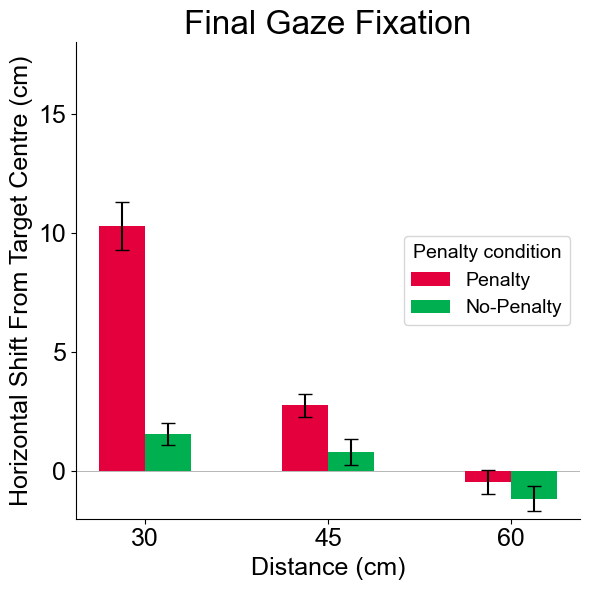

count       mean       std       min  \
Penalty_condition Distance_condition                                         
-500              30                   20.0  10.273100  4.495404 -1.921871   
                  45                   20.0   2.758062  2.212457 -0.398102   
                  60                   20.0  -0.451058  2.266670 -6.286824   
 0                30                   20.0   1.558730  2.139370 -1.891709   
                  45                   20.0   0.807962  2.419087 -1.920253   
                  60                   20.0  -1.151616  2.314035 -5.869785   

                                           25%        50%        75%  \
Penalty_condition Distance_condition                                   
-500              30                  7.554332  11.548331  12.530792   
                  45                  1.133017   2.497348   3.785362   
                  60                 -1.583422  -0.374754   0.766263   
 0                30                  0.332123   1.127957   2.314118   
                  45                 -1.106393   0.741656   2.117661   
                  60                 -2.097664  -0.855570  -0.256666   

                                            max  
Penalty_condition Distance_condition             
-500              30                  16.946704  
                  45                   8.021457  
                  60                   3.518872  
 0                30                   5.782874  
                  45                   8.355005  
                  60                   4.769310

In [8]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of final_fixation_shift_x_mean for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['final_fixation_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar with the updated legend labels
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Final Gaze Fixation", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 19, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)
plt.tight_layout()

# Export plot to folder "figures"
plt.savefig(f'../figures/final_fixation_exp2.png',dpi=300)
plt.show()

# Display descriptive statistics for final_fixation_shift_x_mean
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['final_fixation_shift_x_mean'].describe()

### Inferential stats: Final gaze fixation location

####  2 (Penalty: penalty vs. no-penalty) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [9]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'final_fixation_shift_x_mean'
    normality = pg.normality(group['final_fixation_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
sphercity = pg.sphericity(aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], method= 'mauchly', subject='Vpn')
print(sphercity)

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square
anova_final_fixation = pg.rm_anova(data=aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_final_fixation)

# Perform post-hoc tests
posthoc_final_fixation = pg.pairwise_tests(data=aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_final_fixation

Penalty Condition: -500, Distance Condition: 30
                                   W      pval  normal
final_fixation_shift_x_mean  0.92028  0.100323    True
Penalty Condition: -500, Distance Condition: 45
                                    W      pval  normal
final_fixation_shift_x_mean  0.950296  0.371601    True
Penalty Condition: -500, Distance Condition: 60
                                    W      pval  normal
final_fixation_shift_x_mean  0.961001  0.564033    True
Penalty Condition: 0, Distance Condition: 30
                                    W      pval  normal
final_fixation_shift_x_mean  0.942437  0.266494    True
Penalty Condition: 0, Distance Condition: 45
                                    W      pval  normal
final_fixation_shift_x_mean  0.859815  0.007819   False
Penalty Condition: 0, Distance Condition: 60
                                    W     pval  normal
final_fixation_shift_x_mean  0.937441  0.21442    True
SpherResults(spher=True, W=0.7226202883763116, chi2=5

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameG

,Contrast,Penalty_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Penalty_condition,-,-500,0,True,True,6.848,19.0,two-sided,0.000,NaN,NaN,1.198e+04,1.753
1,Distance_condition,-,30,45,True,True,9.926,19.0,two-sided,0.000,0.000,bonf,2.034e+06,1.849
2,Distance_condition,-,30,60,True,True,12.707,19.0,two-sided,0.000,0.000,bonf,9.361e+07,3.092
3,Distance_condition,-,45,60,True,True,7.513,19.0,two-sided,0.000,0.000,bonf,3.963e+04,1.380
4,Penalty_condition * Distance_condition,-500,30,45,True,True,9.026,19.0,two-sided,0.000,0.000,bonf,5.044e+05,2.121
5,Penalty_condition * Distance_condition,-500,30,60,True,True,10.474,19.0,two-sided,0.000,0.000,bonf,4.575e+06,3.012
6,Penalty_condition * Distance_condition,-500,45,60,True,True,7.168,19.0,two-sided,0.000,0.000,bonf,2.142e+04,1.433
7,Penalty_condition * Distance_condition,0,30,45,True,True,1.513,19.0,two-sided,0.147,0.881,bonf,0.619,0.329
8,Penalty_condition * Distance_condition,0,30,60,True,True,5.750,19.0,two-sided,0.000,0.000,bonf,1497.999,1.216
9,Penalty_condition * Distance_condition,0,45,60,True,True,3.633,19.0,two-sided,0.002,0.011,bonf,22.289,0.828


---

## c. Difference of final gaze fixation location vs. ball location

### Bar plot and descriptive stats

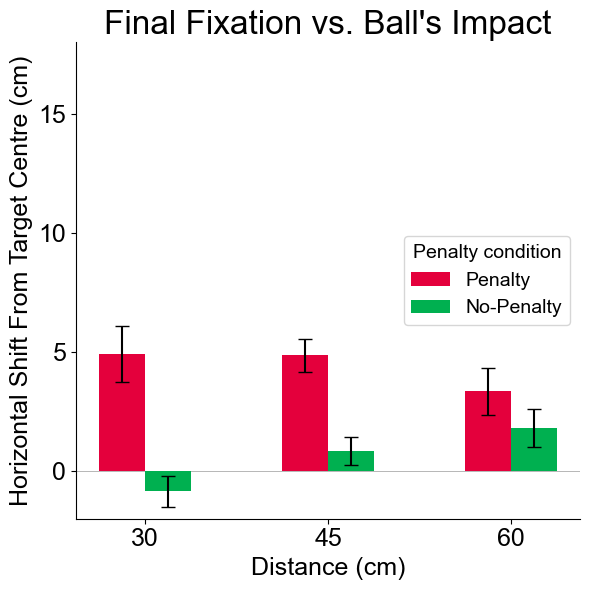

count      mean       std        min  \
Penalty_condition Distance_condition                                         
-500              30                   20.0  4.904266  5.232173  -3.969900   
                  45                   20.0  4.858415  3.075442   0.010936   
                  60                   20.0  3.352339  4.458421  -6.164748   
 0                30                   20.0 -0.852400  2.982201 -10.114893   
                  45                   20.0  0.843787  2.578225  -3.821385   
                  60                   20.0  1.802203  3.589527  -3.959590   

                                           25%       50%       75%        max  
Penalty_condition Distance_condition                                           
-500              30                  2.129690  3.687270  7.326715  20.662882  
                  45                  3.393709  4.332506  6.110679  11.270166  
                  60                  1.094465  2.845798  5.177500  13.203921  
 0                30                 -2.058993 -0.759506  1.287726   3.166592  
                  45                 -0.849627  1.123528  2.371865   6.987101  
                  60                 -0.300197  1.049863  3.403215  13.183170

In [10]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of 'diff_ball_fixation_shift_x_mean' for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['diff_ball_fixation_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
# Standard error in grouped_data
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # Position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar with the updated legend labels
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Final Fixation vs. Ball's Impact", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 19, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)

# Show the plot
plt.tight_layout()
# Export plot to folder "figures"
plt.savefig(f'../figures/diff_fixation_ball_exp2.png',dpi=300)
plt.show()

# Display descriptive statistics for diff_ball_fixation_shift_x_mean
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['diff_ball_fixation_shift_x_mean'].describe()

## Inferential stats: Final fixation vs. Ball

####  2 (Penalty: penalty vs. no-penalty) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [11]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'diff_ball_fixation_shift_x_mean'
    normality = pg.normality(group['diff_ball_fixation_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
sphercity = pg.sphericity(aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], method= 'mauchly', subject='Vpn')
print(sphercity)

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square

anova_diff_fixation_ball = pg.rm_anova(data=aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_diff_fixation_ball)

# Perform post-hoc tests
posthoc_diff_fixation_ball = pg.pairwise_tests(data=aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Distance_condition', 'Penalty_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_diff_fixation_ball

Penalty Condition: -500, Distance Condition: 30
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.900229  0.041649   False
Penalty Condition: -500, Distance Condition: 45
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.955164  0.452293    True
Penalty Condition: -500, Distance Condition: 60
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.975466  0.863297    True
Penalty Condition: 0, Distance Condition: 30
                                        W     pval  normal
diff_ball_fixation_shift_x_mean  0.881668  0.01896   False
Penalty Condition: 0, Distance Condition: 45
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.975984  0.872504    True
Penalty Condition: 0, Distance Condition: 60
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.878248  0.016457   False
Sph

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameG

,Contrast,Distance_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Distance_condition,-,30,45,True,True,-1.611,19.0,two-sided,0.124,0.371,bonf,0.7,-0.290
1,Distance_condition,-,30,60,True,True,-0.637,19.0,two-sided,0.531,1.000,bonf,0.279,-0.162
2,Distance_condition,-,45,60,True,True,0.432,19.0,two-sided,0.670,1.000,bonf,0.253,0.096
3,Penalty_condition,-,-500,0,True,True,5.879,19.0,two-sided,0.000,NaN,NaN,1922.299,1.317
4,Distance_condition * Penalty_condition,30,-500,0,True,True,5.047,19.0,two-sided,0.000,0.000,bonf,375.266,1.352
5,Distance_condition * Penalty_condition,45,-500,0,True,True,4.812,19.0,two-sided,0.000,0.000,bonf,234.404,1.415
6,Distance_condition * Penalty_condition,60,-500,0,True,True,1.597,19.0,two-sided,0.127,0.380,bonf,0.687,0.383


---

## 2. Participants' strategies (i.e. horizontal shift) vs. optimal horizontal shift (predicted by expected gain model)

## a. Plot data vs. model

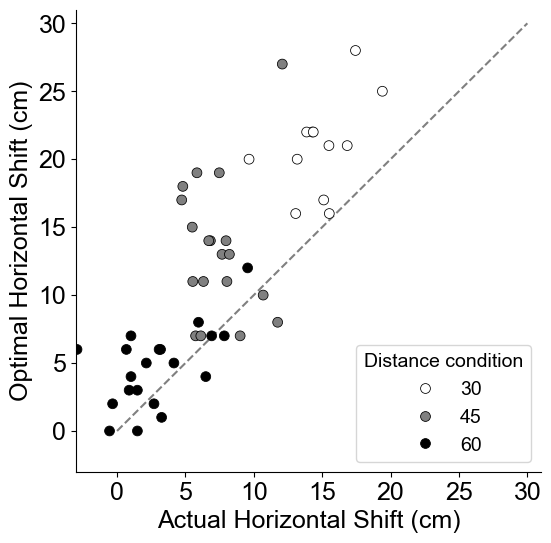

In [12]:
import seaborn as sns

# Font
plt.rcParams['font.family'] = 'Arial'

# Select data with penalty condition -500
data_penalty = aggregated_data_individual[aggregated_data_individual['Penalty_condition'] == -500]

# Define a custom palette for white, black, and grey
custom_palette = {30: 'white', 45: 'grey', 60: 'black'}

# Plot
plt.figure(figsize=(6, 6))
# plot bisection line 
plt.plot([0, 30], [0, 30], linestyle='--', color='grey', zorder=1)
# plot actual vs. optimal shifts
sns.scatterplot(
    x='Ball_impact_shift_x_mean', 
    y='optimal_shift_x_mean', 
    hue='Distance_condition', 
    data=data_penalty, 
    palette=custom_palette, 
    s=50, alpha=1,
    edgecolor='black'
)

# Plot aesthetics
plt.xlabel('Actual Horizontal Shift (cm)', fontsize=18)
plt.ylabel('Optimal Horizontal Shift (cm)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid(False)
plt.xlim(-3, 31)
plt.ylim(-3, 31)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize = 14, title='Distance condition', title_fontsize=14, loc= 'lower right')

# Export plot to folder "figures"
plt.savefig(f'../figures/data_vs_model_exp2.png',dpi=300)
plt.show()


## b. Plot final fixation location vs. ball's impact location vs. optimal aim point location in target space

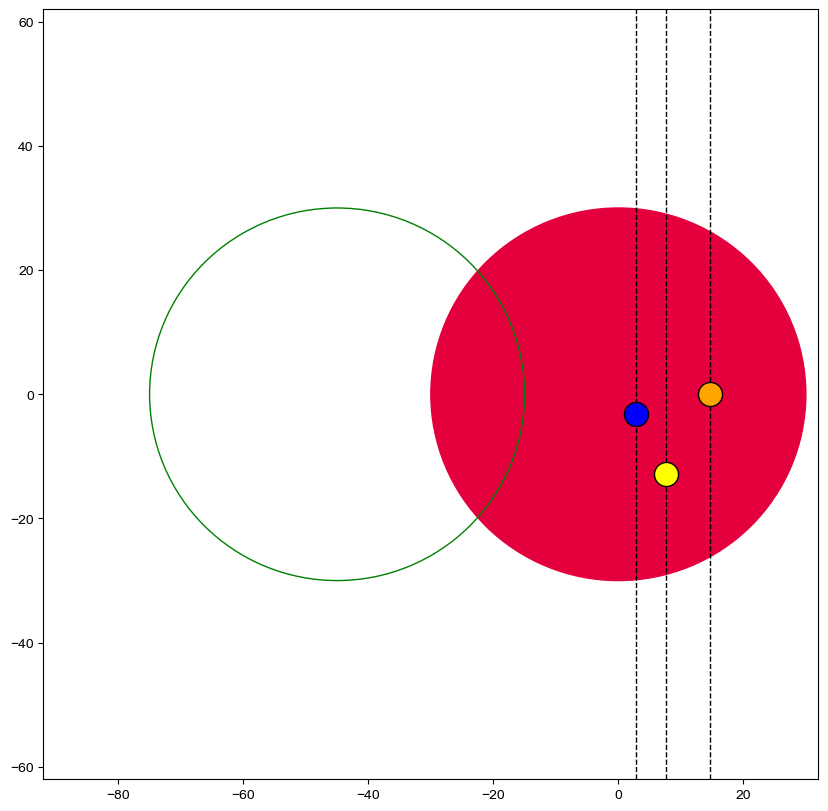

In [13]:

#### Select condition for plot
data_plot_targetspace = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 45)]
####

#Font
plt.figure(figsize=(10,10))

# Mean of final_fixation_shift_x_mean and final_fixation_y_mean
mean_final_fixation_shift_x = np.mean(data_plot_targetspace['final_fixation_shift_x_mean'])
mean_final_fixation_y = np.mean(data_plot_targetspace['final_fixation_y_mean'])

# Mean of Ball_impact_shift_x_mean and Ball_impact_shift_x_mean
mean_Ball_impact_shift_x = np.mean(data_plot_targetspace['Ball_impact_shift_x_mean'])
mean_Ball_impact_y = np.mean(data_plot_targetspace['Ball_impact_y_mean'])

# Mean of optimal_shift_x_mean
optimal_shift_x = np.mean(data_plot_targetspace['optimal_shift_x_mean'])
optimal_shift_y = 0

# Get distance condition to set the position of the red target circle
distance_condition = (data_plot_targetspace['Distance_condition'].iloc[0])
penalty_condition = (data_plot_targetspace['Penalty_condition'].iloc[0])

# Filled red circle with center with radius 30
red_circle = plt.Circle((0, 0), 30, fill=True, color='#e4003c')
plt.gca().add_patch(red_circle)

# Green circle with center and radius 30
green_circle = plt.Circle((distance_condition*-1, 0), 30, fill=False, color='green', linestyle='solid')
plt.gca().add_patch(green_circle)

# Vertical line to the mean point of Ball_impact_shift_x
plt.axvline(x=mean_Ball_impact_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Mean point of Ball_impact_shift_x and mean_Ball_impact_y as a yellow dot
plt.scatter(mean_Ball_impact_shift_x, mean_Ball_impact_y, c='yellow', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Vertical line to the mean point of final_fixation_shift_x
plt.axvline(x=mean_final_fixation_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Mean point of final_fixation_shift_x and final_fixation_y as a blue dot
plt.scatter(mean_final_fixation_shift_x, mean_final_fixation_y, c='blue', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Vertical line to the mean point of optimal aimpoint
plt.axvline(x=optimal_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Plot the mean point of optimal aimpoint as a red dot 
plt.scatter(optimal_shift_x, optimal_shift_y, c='orange', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Set the x and y limits
plt.xlim(-92, 32)
plt.ylim(-62, 62)

# Export plot to folder "figures"
plt.savefig(f'../figures/target_space{distance_condition}_{penalty_condition}.png',dpi=300)
plt.show()


## c. Test wether the difference between fixation-optimal is sig. larger than ball-optimal

- in penalty -500 / distance 30
- in penalty -500 / distance 45

In [14]:
# Filter data for penalty condition -500 and distance condition 30
data_penalty_30 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 30)]
# Filter data for penalty condition -500 and distance condition 45
data_penalty_45 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 45)]

### Run paired t-tests 
- Two-sided
- Bonferroni correction (as two t-tests were performed)

### Condition: Penalty -500, Distance 30

In [15]:
# Run paired t-test and calculate Cohen's d
# Check assumptions

data_penalty_30 = data_penalty_30.assign(differences_30 = data_penalty_30.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_30.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_30["differences_30"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_30 = pg.ttest(data_penalty_30['diff_fixation_optimal_mean'], data_penalty_30['diff_ball_optimal_mean'], paired=True)
print(ttest_results_30)

wilcoxon_results_30 = pg.wilcoxon(data_penalty_30['diff_fixation_optimal_mean'], data_penalty_30['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_30) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = ttest_results_30.iloc[0]['p-val'] * 2

bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                       W      pval  normal
differences_30  0.900229  0.041649   False
               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  4.191861   19   two-sided  0.000494  [2.46, 7.35]  0.421754  67.677   

           power  
T-test  0.432891  
          W-val alternative     p-val       RBC    CLES
Wilcoxon   12.0   two-sided  0.000134  0.885714  0.6325

P-value after Bonferroni correction:
0.0009888235640108623


### Condition: Penalty -500, Distance 45

In [16]:
# Run paired t-test and calculate Cohen's d
# Check assumptions
data_penalty_45 = data_penalty_45.assign(differences_45 = data_penalty_45.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_45.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_45["differences_45"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_45 = pg.ttest(data_penalty_45['diff_fixation_optimal_mean'], data_penalty_45['diff_ball_optimal_mean'], paired=True)
print(ttest_results_45)

wilcoxon_results_45 = pg.wilcoxon(data_penalty_45['diff_fixation_optimal_mean'], data_penalty_45['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_45) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = ttest_results_45.iloc[0]['p-val'] * 2
bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                       W      pval  normal
differences_45  0.955164  0.452293    True
               T  dof alternative     p-val        CI95%   cohen-d       BF10  \
T-test  7.064834   19   two-sided  0.000001  [3.42, 6.3]  0.646405  1.778e+04   

          power  
T-test  0.78296  
          W-val alternative     p-val  RBC    CLES
Wilcoxon    0.0   two-sided  0.000002  1.0  0.6875

P-value after Bonferroni correction:
2.0170522904673497e-06
